In [99]:
import pandas as pd
import numpy as np 
import pytz
import datetime as datetime
from pytz import timezone
import engarde.decorators as ed
import engarde.checks as ec
import matplotlib.pyplot as plt
from chemspipy import ChemSpider
cs = ChemSpider('0df3af46-59aa-4abd-9907-0645660a985d')
import re
import cims_analysis as ca
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from scipy import stats
from IPython.display import display, HTML
from bokeh.plotting import figure
from bokeh.io import output_file, show

# Imported data as dataframe and converted timezone

In [21]:
df = pd.read_csv("/media/sf_Ubuntu/share/ultimatecimsdataset.csv", parse_dates=['UTC'],date_parser=lambda s: pd.datetime.strptime(s, '%d/%m/%Y %H:%M'))
x = pd.Series(pd.DatetimeIndex(df['UTC'].values)
         .tz_localize('UTC').tz_convert('Asia/Shanghai'))
df = df.set_index(x)
#print (len(df))
df

UTC  lastreadheatzone0        I  \
2017-06-18 13:42:00+08:00 2017-06-18 05:42:00           142.7770  23498.3   
2017-06-18 13:43:00+08:00 2017-06-18 05:43:00           187.8500  23462.9   
2017-06-18 13:44:00+08:00 2017-06-18 05:44:00           198.4980  23386.4   
2017-06-18 13:45:00+08:00 2017-06-18 05:45:00           202.6400  23240.8   
2017-06-18 13:46:00+08:00 2017-06-18 05:46:00           204.3150  23247.0   
2017-06-18 13:47:00+08:00 2017-06-18 05:47:00           205.4800  23243.4   
2017-06-18 13:48:00+08:00 2017-06-18 05:48:00           206.5820  23217.5   
2017-06-18 13:49:00+08:00 2017-06-18 05:49:00           208.0530  23215.1   
2017-06-18 13:50:00+08:00 2017-06-18 05:50:00           208.8350  23180.9   
2017-06-18 13:51:00+08:00 2017-06-18 05:51:00           210.0230  23183.8   
2017-06-18 13:52:00+08:00 2017-06-18 05:52:00           210.6400  23203.6   
2017-06-18 13:53:00+08:00 2017-06-18 05:53:00           211.5330  23186.9   
2017-06-18 13:54:00+08:00 2017-06-18 05:54:00           212.4700  23085.2   
2017-06-18 13:55:00+08:00 2017-06-18 05:55:00           213.2550  23113.1   
2017-06-18 13:56:00+08:00 2017-06-18 05:56:00           213.6930  23110.2   
2017-06-18 13:57:00+08:00 2017-06-18 05:57:00           214.6500  23084.2   
2017-06-18 13:58:00+08:00 2017-06-18 05:58:00           215.2120  23066.4   
2017-06-18 13:59:00+08:00 2017-06-18 05:59:00           215.8270  23036.5   
2017-06-18 14:00:00+08:00 2017-06-18 06:00:00           216.3350  23131.1   
2017-06-18 14:01:00+08:00 2017-06-18 06:01:00           216.6780  23055.4   
2017-06-18 14:02:00+08:00 2017-06-18 06:02:00           217.1730  23076.9   
2017-06-18 14:03:00+08:00 2017-06-18 06:03:00           217.5600  23113.7   
2017-06-18 14:04:00+08:00 2017-06-18 06:04:00           217.8300  23018.2   
2017-06-18 14:05:00+08:00 2017-06-18 06:05:00           218.1630  23062.7   
2017-06-18 14:06:00+08:00 2017-06-18 06:06:00           218.2830  23041.7   
2017-06-18 14:07:00+08:00 2017-06-18 06:07:00           192.0930  23165.4   
2017-06-18 14:08:00+08:00 2017-06-18 06:08:00           168.1700  23304.4   
2017-06-18 14:09:00+08:00 2017-06-18 06:09:00           141.1270  23407.0   
2017-06-18 14:10:00+08:00 2017-06-18 06:10:00           111.5170  23533.0   
2017-06-18 14:11:00+08:00 2017-06-18 06:11:00            84.1167  23325.3   
...                                       ...                ...      ...   
2017-06-25 09:21:00+08:00 2017-06-25 01:21:00                NaN  17974.4   
2017-06-25 09:22:00+08:00 2017-06-25 01:22:00            26.3433  17944.8   
2017-06-25 09:23:00+08:00 2017-06-25 01:23:00                NaN  17972.3   
2017-06-25 09:24:00+08:00 2017-06-25 01:24:00            26.1233  17891.8   
2017-06-25 09:25:00+08:00 2017-06-25 01:25:00                NaN  17894.6   
2017-06-25 09:26:00+08:00 2017-06-25 01:26:00                NaN  17939.5   
2017-06-25 09:27:00+08:00 2017-06-25 01:27:00            26.3800  17934.4   
2017-06-25 09:28:00+08:00 2017-06-25 01:28:00                NaN  17851.5   
2017-06-25 09:29:00+08:00 2017-06-25 01:29:00            26.4700  17972.4   
2017-06-25 09:30:00+08:00 2017-06-25 01:30:00            26.4450  17938.7   
2017-06-25 09:31:00+08:00 2017-06-25 01:31:00                NaN  17999.6   
2017-06-25 09:32:00+08:00 2017-06-25 01:32:00                NaN  18051.7   
2017-06-25 09:33:00+08:00 2017-06-25 01:33:00            26.3167  17922.8   
2017-06-25 09:34:00+08:00 2017-06-25 01:34:00                NaN  17877.3   
2017-06-25 09:35:00+08:00 2017-06-25 01:35:00                NaN  17964.9   
2017-06-25 09:36:00+08:00 2017-06-25 01:36:00                NaN  17921.6   
2017-06-25 09:37:00+08:00 2017-06-25 01:37:00            26.6717  17907.1   
2017-06-25 09:38:00+08:00 2017-06-25 01:38:00                NaN  17982.1   
2017-06-25 09:39:00+08:00 2017-06-25 01:39:00                NaN  17952.5   
2017-06-25 09:40:00+08:00 2017-06-25 01:40:00                NaN  17894.0   
2017-06-25 09:41:00+08:00 2017-06-25 0

# Cleaning Data 

In [22]:
df = df[((df.IMRPRESSURE - df.IMRPRESSURE.mean())/ df.IMRPRESSURE.std()).abs()<1]
df.IMRPRESSURE.plot()
#plt.show()
#clean on basis of thermogram behaviour
#clean on basis of I behaviour df['I'].min()
#print (len(df))
df=df[((df.I -df.I.mean())/df.I.std()).abs()<3]
#df.I.plot()
#plt.show()
#df

# Split gas and aerosol phase into new dataframes

In [23]:
gasphase=df[df['STEPTYPE']==1]
aerosolphase = df[(df['STEPTYPE'] >= 2) & (df['STEPTYPE'] <=4)]
gasphase.columns

Index(['UTC', 'lastreadheatzone0', 'I', 'IH2O', 'IHCN', 'IH2O2', 'IC2H4O2',
       'IHNO3', 'IC2H5NO2', 'IC2H5O3', 'ICLNO2', 'IC2H3NO3', 'IC3H8O3',
       'IC6H6O', 'IC3H6O4', 'IC4H2O4', 'IN2O5', 'IC4H8O4', 'IC9H8NO2',
       'IC10H14NO3', 'IC5H4O7', 'STEPTYPE', 'IMRPRESSURE', 'SSQPRESSURE',
       'BSQPRESSURE'],
      dtype='object')

# Background correct

In [24]:
#create a new df with np.trapz values for each section which includes the ramp, soak and cool of the "steptype" and 
#then assign this the datetime of the start of the ramp 

In [25]:
df["figaerostate"] = pd.cut(df['STEPTYPE'], bins=[0, 1, 2, 3, 4], include_lowest=False, labels=['GASPHASE', 'RAMP', 'SOAK','COOL'])

#ADDED A COLUMN WHICH STATES WHICH FIGAERO STATE

#df2 = df.groupby(
       # ['figaerostate',df.figaerostate.ne(df.figaerostate.shift()).cumsum().rename('grp')])

groups = df[df["STEPTYPE"].shift()]== 2.0

KeyError: '[ nan   2.   2. ...,   1.   1.   1.] not in index'

# BINNING DATA ACCORDING TO OTHER POLLUTANT 

In [ ]:
bins = [0, 10, 100, 1000, 10000]
group_names = ['Low', 'Okay', 'Poor', 'High']

df["binned"] = pd.cut(df['IHNO3'], bins, labels=group_names)

#print(df)

poornitric = df[df["binned"]== 'Okay']
poornitric

# Reagent ion normalisation 

In [ ]:
#df = df.pipe()
#ec.within_n_std(df[df['SSQPRESSURE']],n=2)


# Summing Thermograms

In [ ]:
allspecies_df = aerosolphase[aerosolphase.columns.difference(['UTC', 'lastreadheatzone0' ,'I','IH2O',
                                                              'STEPTYPE','IMRPRESSURE','BSQPRESSURE','SSQPRESSURE'])]
summedthermograms = allspecies_df.sum(axis=1) #sumsrows
summedthermograms
summedthermograms.iloc[1910:1950].plot()
plt.show()

# Selecting TMax

In [ ]:
Tmax = aerosolphase.groupby(
        ['STEPTYPE',aerosolphase.STEPTYPE.ne(aerosolphase.STEPTYPE.shift()).cumsum().rename('grp')]
).lastreadheatzone0.max().loc[2].plot(linestyle="", marker= "o")

#add to this code to plot the temp when the conc of pollutant is at max 
plt.show()

# Looking at Correlations between Species

In [ ]:
df.corr()


# Importing ChemSpiPy & Determining OC ratios 

In [ ]:
chemicals =  (re.findall('[A-Z][a-z]?|[0-9]+','C5H7O3'))
chemicals.astype(int)

In [ ]:
cs.simple_search_by_mass(df['mass'],0.005).append[df['searches']]

In [ ]:
ret = []
ans = re.findall(r'([A-Z][a-z]*(\d*)',moiety)
for df, value in enumerate(ans):
    val1 = value[1]
    if len(val1) ==0: 
         val1 = 1
    ret.append((unicode(value[0]), int(val1))):
        return df.OrderedDict(ret)


# Multivariate Analysis

In [56]:
gasphase
gasphase.dropna().astype(int)
#sns.distplot(gasphase.lastreadheatzone0.dropna())
#sns.distplot(gasphase.IH2O2.dropna())
#plt.show()

#sns.jointplot(data=gasphase, x= 'IH2O2', y='IHNO3', kind='reg',color='g')
#sns.plt.show()

#sns.heatmap(gasphase[1:4].corr(), annot=True, fmt=".2f")
#plt.show()

#print(gasphase[['IC2H5NO2','IHNO3']].corr()) ##FINDING THE CORRELATION BETWEEN TWO ROWS OF A DATAFRAME 

          IC2H5NO2     IHNO3
IC2H5NO2  1.000000  0.361593
IHNO3     0.361593  1.000000


# Apply calibration factors 

In [73]:
#defining cal factors 

def formic(data):
    x = 2.5 #this is cal factor 
    return data*x 

def nitric(data):
    y = x/3 
    return y 

/home/archit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


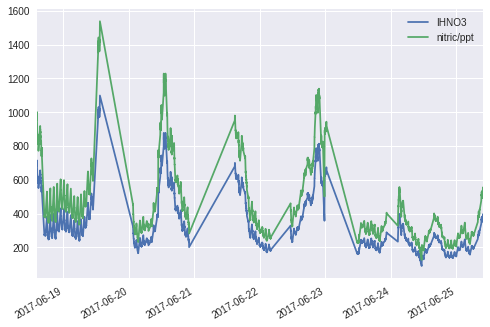

NameError: name 'gb' is not defined

In [106]:
#applying cal factors to df 

formic = lambda x: x*2.5

nitric = lambda x: x*1.4

gasphase['nitric/ppt']= gasphase['IHNO3'].apply(nitric)
gasphase[['IHNO3','nitric/ppt']].plot()
plt.show()

gb.transform(formic)

# Plotting 

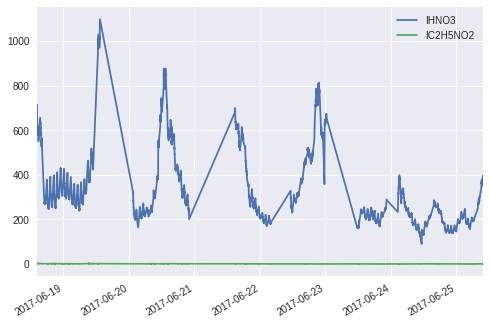

In [88]:
gasphase[['IHNO3','IC2H5NO2']].plot()
plt.show()

In [101]:
from bokeh.charts import Scatter 
p = Scatter(gasphase, x='IHNO3',y='IHCN', marker = 'square',xlabel='nitric acid/cps', ylabel = 'hydrogen cyanide/cps')
#show(p)

#scatterplot

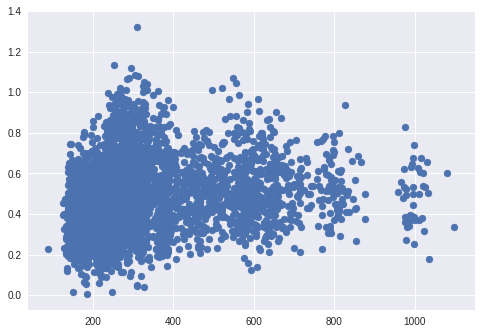

In [105]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(gasphase['IHNO3'],gasphase['IHCN'])
plt.show()